## Constant Control

In [5]:
using DifferentialEquations,Plots

In [2]:
T = 300
tspan = (0,T);

Set of Parameters 1: equilbrium with both species

In [3]:
# Set 1: Moderate Growth, Constant Fishing Effort
r = 0.3
K = 100
a = 0.1
b = 0.2
m = 0.25
q1 = 0.005
q2 = 0.004
E = 5.0
x0 = 50
y0 = 10;

In [4]:
function system_1!(du, u, p, t)
    du[1] = r * u[1] * (1 - u[1]/K) - a * u[1] * u[2] - q1 * u[1] * E
    du[2] = a * b * u[1] * u[2] - m * u[2] - q2 * u[2] * E
end

system_1! (generic function with 1 method)

In [5]:
u0 = [x0,y0]
prob = ODEProblem(system_1!,u0, tspan)
sol_1 = solve(prob, Tsit5(), saveat = 0.01);

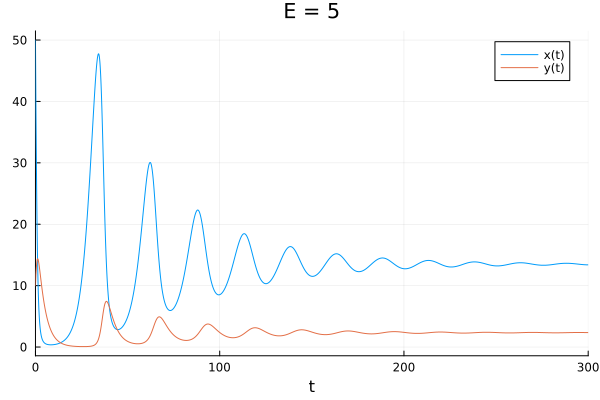

In [6]:
plot(sol_1, label=["x(t)" "y(t)"], title = "E = 5")

Set of parameters 2: predator go close to extinction

In [7]:
# Set 2: Higher Predation, More Intense Fishing
r = 0.6
K = 150
a = 0.02
b = 0.03
m = 0.12
q1 = 0.008
q2 = 0.006
E_const = 7.0

x0 = 70
y0 = 20;

In [8]:
function system_2!(du, u, p, t)
    du[1] = r * u[1] * (1 - u[1]/K) - a * u[1] * u[2] - q1 * u[1] * E
    du[2] = a * b * u[1] * u[2] - m * u[2] - q2 * u[2] * E
end

system_2! (generic function with 1 method)

In [9]:
u0 = [x0,y0]
prob = ODEProblem(system_2!,u0, tspan)
sol_2 = solve(prob, Tsit5(), saveat = 0.01);

In [10]:
plot(sol_2, label=["x(t)" "y(t)"], title = "E = 7")
savefig("e7.pdf")

"/Users/diogovieira/Library/CloudStorage/Dropbox/UChile/Control Óptimo/Proyecto/e7.pdf"

Set of Parameters 3: equilibrium with more predator than preys

In [11]:
r = 0.8        
K = 100
a = 0.08       
b = 0.3    
m = 0.1        
q1 = 0.005 
q2 = 0.004 
E = 0      

x0 = (m+q2*E)/(a*b)
y0 = (1/a)*(r*(1-x0/K)-q1*E);

In [12]:
function system_3!(du, u, p, t)
    du[1] = r * u[1] * (1 - u[1]/K) - a * u[1] * u[2] - q1 * u[1] * E
    du[2] = a * b * u[1] * u[2] - m * u[2] - q2 * u[2] * E
end

system_3! (generic function with 1 method)

In [13]:
u0 = [x0+15,y0+5]
prob = ODEProblem(system_3!,u0, tspan)
sol_3 = solve(prob, Tsit5(), saveat = 0.01);

In [14]:
plot(sol_3, label=["x(t)" "y(t)"])
savefig("e0_1.pdf")

"/Users/diogovieira/Library/CloudStorage/Dropbox/UChile/Control Óptimo/Proyecto/e0_1.pdf"

In [15]:
r = 0.6       
K = 100        
a = 0.7     
b = 0.8    
m = 0.1        
q1 = 0.005 
q2 = 0.004 
E = 0      

x0 = (m+q2*E)/(a*b)
y0 = (1/a)*(r*(1-x0/K)-q1*E);

In [16]:
function system_4!(du, u, p, t)
    du[1] = r * u[1] * (1 - u[1]/K) - a * u[1] * u[2] - q1 * u[1] * E
    du[2] = a * b * u[1] * u[2] - m * u[2] - q2 * u[2] * E
end

system_4! (generic function with 1 method)

In [17]:
u0 = [x0+15,y0+5]
prob = ODEProblem(system_4!,u0, tspan)
sol_4 = solve(prob, Tsit5(), saveat = 0.01);

In [18]:
plot(sol_4, label=["x(t)" "y(t)"])
savefig("e0_2.pdf")

"/Users/diogovieira/Library/CloudStorage/Dropbox/UChile/Control Óptimo/Proyecto/e0_2.pdf"

## Optimal Control

In [1]:
using OptimalControl, NLPModelsIpopt

In [ ]:
T = 10
tspan = (0,T)

r = 0.2
K = 1000
a = 0.01
b = 0.1
m = 0.1
q1 = 0.01
q2 = 0.02
p1 = 1000
p2 = 1000
c = 400
delta = 0.01
Emax = 30

z0 = 500
y0 = 100;

In [20]:
u0 = [z0, y0]  

ocp = @def begin
    t ∈ [0, T], time
    z = (x, y) ∈ R², state 
    E ∈ R, control

    z(0) == u0    
    ∂(z)(t) == [
        r*x(t)*(1 - x(t)/K) - a*x(t)*y(t) - q1*x(t)*E(t),                 
        a*b*x(t)*y(t) - m*y(t) - q2*y(t)*E(t)
    ]

    ∫(exp(-delta*t) * (-p1*x(t)*E(t) - p2*y(t)*E(t) + c*E(t))) → min

    0 <= E(t) <= Emax
    x(t) >= 0
    y(t) >= 0
end

sol = solve(ocp, grid_size=1000)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:    20003
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     4004

Total number of variables............................:     4004
                     variables with only lower bounds:     2002
                variables with lower and upper bounds:     1001
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3003
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 4.90e+00 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

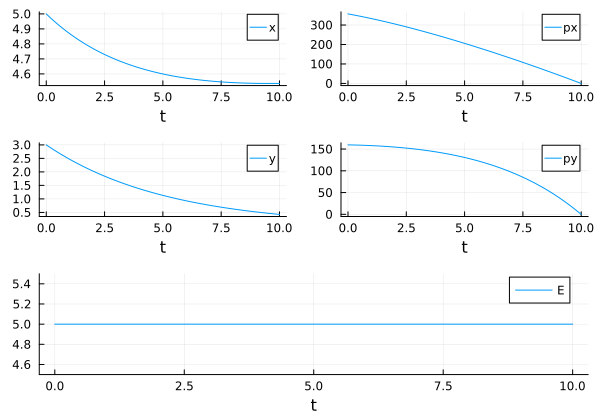

In [21]:
plot(sol)

In [ ]:
using LaTeXStrings

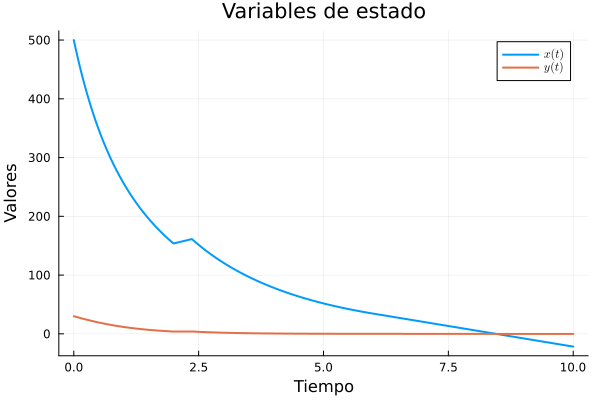

In [ ]:
time_int = 0:0.01:10 

x_vals = [sol.state(t)[1] for t in time_int]
y_vals = [sol.state(t)[2] for t in time_int]

plot(time_int, [x_vals, y_vals],
    label=[L"x(t)" L"y(t)"],
    xlabel="Tiempo",
    ylabel="Valores",
    title="Variables de estado",
    linewidth=2,
    legend=:topright)

In [ ]:
sol.objective

-5.169427357962428e7

## Principio de Maximo de Pontryagin

In [16]:
using JuMP, Ipopt

In [45]:
function ControlOptimo(x,p,t)
    dHdu = -(p1 * x[1] + p2 * x[2] - c) * exp(-delta*t) - p[1]*q1*x[1] - p[2]*q2*x[2]
    if dHdu <= 0
        return Emax
    else
        return 0
    end
end;

In [46]:
function system_4!(du, u, p, t)
    
    du[1] = r * u[1] * (1 - u[1]/K) - a * u[1] * u[2] - q1 * u[1] * ControlOptimo(u[1:2],u[3:4],t) 
    du[2] = a * b * u[1] * u[2] - m * u[2] - q2 * u[2] * ControlOptimo(u[1:2],u[3:4],t)
    
    du[3] = p1 * ControlOptimo(u[1:2],u[3:4],t) * exp(-delta * t) + u[3]*(r*(2*u[1]/K - 1) + a * u[2] + q1 * ControlOptimo(u[1:2],u[3:4],t)) - u[4] * a * b * u[2]
    du[4] = p2 * ControlOptimo(u[1:2],u[3:4],t) * exp(-delta * t) + u[3] * a * u[1] + u[4] * (-a*b*u[1] + m + q2 * ControlOptimo(u[1:2],u[3:4],t))
   
end;

In [47]:
function loss_objective(p0) 
    u0 = [z0,y0,p0[1],p0[2]]
    prob = ODEProblem(system_4!,u0, tspan)
    sol = solve(prob, Tsit5(), saveat = 0.01)
    return sum(x^2 for x in sol(T)[3:4]) 
end

start_value = [1000, 1000]
tspan = (0,T)

obj(p0...) = loss_objective(p0)

model = Model(Ipopt.Optimizer)

JuMP.register(model, :obj, 2, obj; autodiff=true)
set_optimizer_attribute(model, "max_cpu_time", 600.0) 
set_optimizer_attribute(model, "tol", 1e-5)  
set_optimizer_attribute(model, "acceptable_tol", 1e-5) 

@variable(model, p0[i=1:2], start=start_value[i])

@NLobjective(model, Min, obj(p0...))

optimize!(model)

p0 = value.(p0)

u0 = [z0, y0, p0[1], p0[2]]

prob = ODEProblem(system_4!, u0, tspan)
sol_p4 = solve(prob, Tsit5(), saveat=0.001)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.4714076e+16 0.00e+00 1.06e+04   0.0 0.00e+00    -  0.00e+00 0.00e+00 

retcode: Success
Interpolation: 1st order linear
t: 10001-element Vector{Float64}:
  0.0
  0.001
  0.002
  0.003
  0.004
  0.005
  0.006
  0.007
  0.008
  0.009
  0.01
  0.011
  0.012
  ⋮
  9.989
  9.99
  9.991
  9.992
  9.993
  9.994
  9.995
  9.996
  9.997
  9.998
  9.999
 10.0
u: 10001-element Vector{Vector{Float64}}:
 [500.0, 100.0, -33762.35590170785, 157369.41849269558]
 [499.40043979807524, 99.97997201945228, -33791.98894413917, 157262.14409529508]
 [498.8017583599669, 99.95988816006974, -33821.63205450784, 157154.9965400615]
 [498.2039544380988, 99.93974854515614, -33851.28522097891, 157047.9755953687]
 [497.60702678612756, 99.91955329789893, -33880.948431702156, 156941.08103006004]
 [497.01097415894316, 99.89930254136938, -33910.62167481202, 156834.31261344824]
 [496.41579531266837, 99.87899639852245, -33940.30493842767, 156727.67011531547]
 [495.82148900465904, 99.85863499219685, -33969.998210652964, 156621.15330591323]
 [495.22805399350415, 99.83821844511507, -33999.70147957

In [48]:
println("Optimal p0: ", p0)

Optimal p0: [-33762.35590170785, 157369.41849269558]


In [56]:
using LaTeXStrings

N = T*1000+1

t_values = range(0, T, length=N)

plot(t_values, sol_p4[3:4, :]',label=[L"\lambda_1" L"\lambda_2"],  # Use LatexStrings for labels
title="Estados adjuntos", 
xlabel="Tiempo", 
ylabel="Valores", 
lw=2)

savefig("pmp_adjoint.pdf")

"/Users/diogovieira/Library/CloudStorage/Dropbox/UChile/Control Óptimo/Proyecto/pmp_adjoint.pdf"

In [55]:
plot(t_values, sol_p4[1:2, :]',label=[L"x(t)" L"y(t)"],  # Use LatexStrings for labels
title="Variables de Estado", 
xlabel="Tiempo", 
ylabel="Valores", 
lw=2)

savefig("pmp_states.pdf")

"/Users/diogovieira/Library/CloudStorage/Dropbox/UChile/Control Óptimo/Proyecto/pmp_states.pdf"

In [60]:
control_values = [ControlOptimo(sol_p4(t)[1:2], sol_p4(t)[3:4], t) for t in t_values]

plot(t_values, control_values, label="E(t)", xlabel="Tiempo", ylabel="Control Value", lw=2, title = "Control")
savefig("pmp_control.pdf")


"/Users/diogovieira/Library/CloudStorage/Dropbox/UChile/Control Óptimo/Proyecto/pmp_control.pdf"

In [52]:
function trapz(x, y)
    n = length(x)
    area = 0.0
    for i in 1:n-1
        area += (y[i] + y[i+1]) * (x[i+1] - x[i]) / 2.0
    end
    return area
end

function profit_integrand(t, sol)
    x = sol(t)[1]
    y = sol(t)[2]
    E = ControlOptimo(sol(t)[1:2], sol(t)[3:4], t)
    π = (p1 * x * E + p2 * y * E - c * E) * exp(-delta * t)
    return π
end


function compute_total_profit(sol)
    time_points = sol.t
    integrand_values = [profit_integrand(t, sol) for t in time_points]
    J = trapz(time_points, integrand_values)  # Trapezoidal integration
    return J
end

function cumulative_profit(sol)
    time_points = sol.t
    integrand_values = [profit_integrand(t, sol) for t in time_points]
    J_cumulative = cumsum([0; diff(time_points)] .* integrand_values)  # Cumulative trapezoidal integration
    return time_points, J_cumulative
end

cumulative_profit (generic function with 1 method)

In [53]:
compute_total_profit(sol_p4)

2.8026345960863844e7

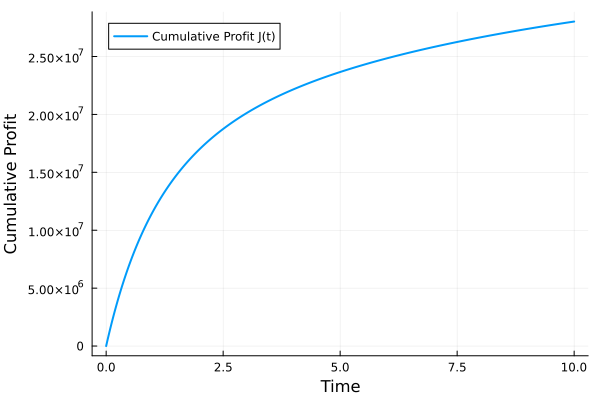

In [54]:
time_points, J_cumulative = cumulative_profit(sol_p4)

plot(time_points, J_cumulative, label="Cumulative Profit J(t)", xlabel="Time", ylabel="Cumulative Profit", lw=2)
